# PREVIEW
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

# Business Goal:  
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

=========================================
# Dataset characteristics
=========================================	
day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
	
=========================================

## Steps to follow
1.Reading and Understanding Data  
2.Visualising the Data  
3.Data Preparation  
4.Splitting the Data into Training and Testing Sets  
5.Feature Scaling  
6.Building the Model  
7.Residual Analysis of the train data  
8.Making predictions using final model  
9.Model Evaluation  

# Step 1: Reading and Understanding Data

### Importing the Libraries which will be reqd 

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('day.csv')

In [4]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# All the entries are non null so no need to do any deletion work 

In [7]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# Step 2: Visualising the Data

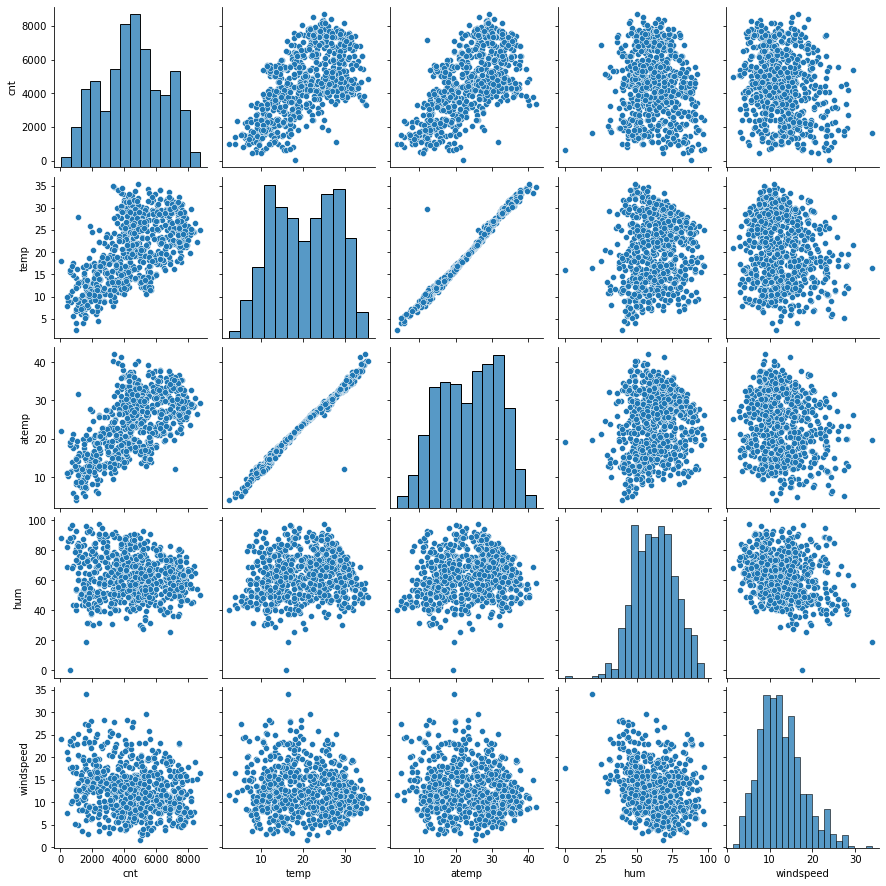

In [8]:
# VISUALISING THE NUMERICAL DATA/COLUMNS 
sns.pairplot(data,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

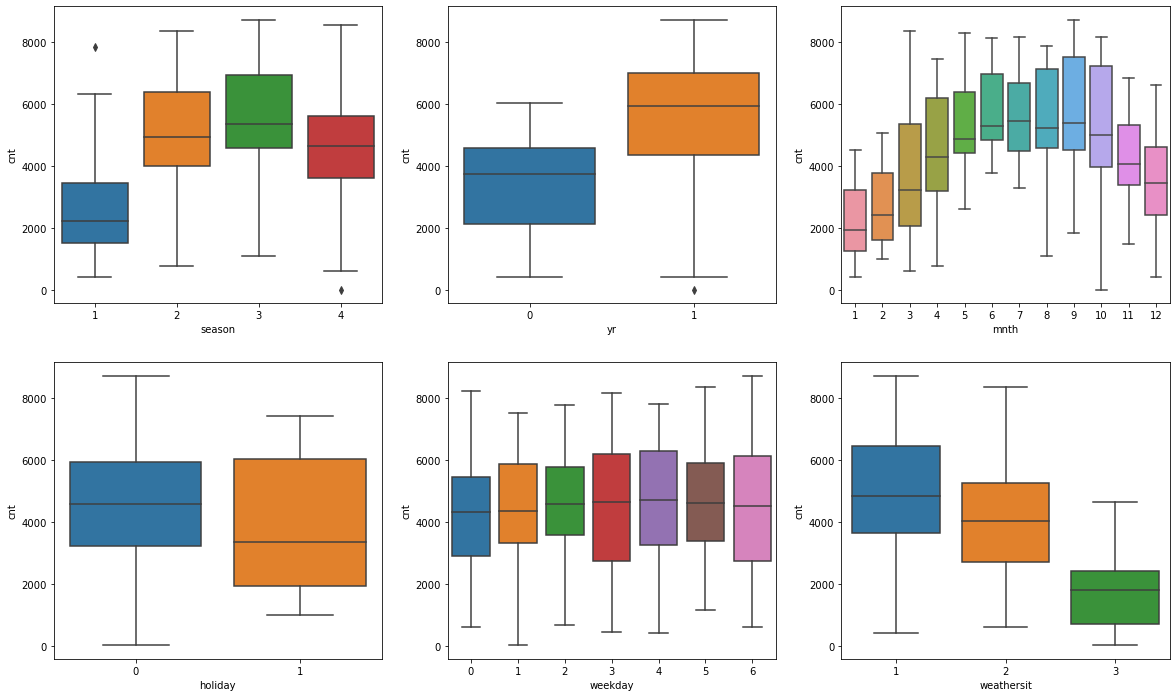

In [9]:
# VISUALISING THE CATEGORICAL DATA/COLUMNS 
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = data)
plt.subplot(2,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = data)
plt.subplot(2,3,3)
sns.boxplot(x = 'mnth',y = 'cnt', data = data)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday',y = 'cnt', data = data)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday',y = 'cnt', data = data)
plt.subplot(2,3,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = data)
plt.show()

<AxesSubplot:xlabel='temp', ylabel='cnt'>

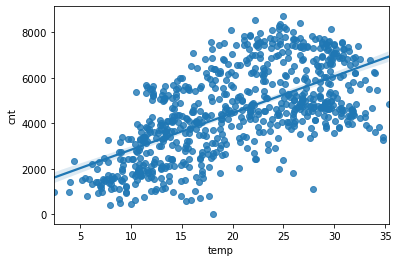

In [10]:
sns.regplot(x='temp',y='cnt',data = data)

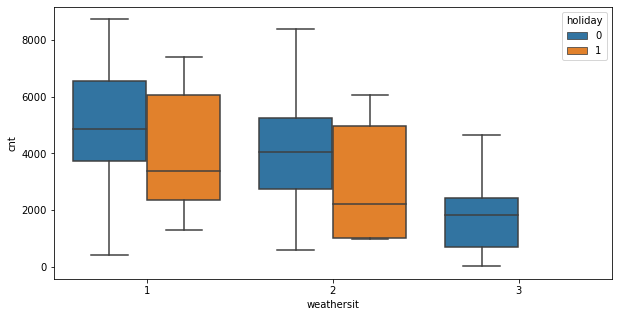

In [11]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'weathersit', y = 'cnt', hue = 'holiday', data = data)
plt.show()

# Step 3: Data Preparation

#### Here we have to modify our categorical columns with the Dummy Variable for our Model as
#### But in order to fit a regression line, we would need numerical values and not string. Hence, we need to convert them to 1s and 0s, where 1 is a 'Yes' and 0 is a 'No'.

In [12]:
# converting the data column number to their meaning for proper understanding and also making their datatype CATEGORICAL

In [13]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [14]:
data.season = data.season.replace(to_replace=[1,2,3,4],value =['spring','summer','fall','winter'])

In [15]:
data['season'].unique()

array(['spring', 'summer', 'fall', 'winter'], dtype=object)

In [16]:
#data.mnth = data.mnth.replace(to_replace=[1,2,3,4,5,6,7,8,9,10,11,12],value = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec' ])
import calendar
data['mnth'] = data['mnth'].apply(lambda x: calendar.month_abbr[x])

In [17]:
data['holiday'].unique()
data['holiday'].value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [18]:
data.weekday = data.weekday.replace(to_replace = [1,2,3,4,5,6,0], value= ['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])

In [19]:
data.weathersit = data.weathersit.replace(to_replace=[1,2,3,4],value = ['Clear','Cloudy','Snowy','Rainy'])

In [20]:
# Dropping some columns 
data.drop(['instant','dteday'],axis=1,inplace=True)

In [21]:
data.drop(['casual','registered'],axis=1,inplace=True)

In [22]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [23]:
# Adding dummy Variables for our categorical variable 
cat_var = ['season','mnth','weekday','weathersit']
dummy = data[cat_var]

In [24]:
dummy = pd.get_dummies(dummy,drop_first=True )

In [25]:
data = pd.concat([dummy,data],axis=1)

In [26]:
data.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Sat,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Sun,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [27]:
data.shape

(730, 34)

In [28]:
# Removing the columns
data.drop(cat_var,axis=1,inplace=True)

# Step 4: Splitting the Data into Training and Testing Sets¶


In [29]:
from sklearn.model_selection import train_test_split
#np.random.seed(0)
df_train,df_test = train_test_split(data,train_size=0.7,test_size=0.3,random_state=100)

# Step 5: Rescaling the Features 

In [30]:
from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler()

In [31]:
num_vars = ['temp','hum','windspeed','cnt','atemp']
df_train[num_vars] = Scaler.fit_transform(df_train[num_vars])
#Scaler = MinMaxScaler().fit(df_train[num_vars])

In [32]:
df_test[num_vars] = Scaler.transform(df_test[num_vars])
df_test.describe()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Cloudy,weathersit_Snowy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,...,0.319635,0.027397,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592
std,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,...,0.467403,0.163612,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300


In [33]:
df_test['cnt']

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
         ...   
400    0.336516
702    0.757478
127    0.495973
640    0.868615
72     0.232858
Name: cnt, Length: 219, dtype: float64

In [34]:
df_train.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Cloudy,weathersit_Snowy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
653,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243
576,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658
426,1,0,0,0,0,0,0,0,0,1,...,1,0,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255
728,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096
482,0,1,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973


In [35]:
df_train.describe()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Cloudy,weathersit_Snowy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,...,0.343137,0.029412,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620
std,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,...,0.475223,0.169124,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
df_test.describe()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Cloudy,weathersit_Snowy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,...,0.319635,0.027397,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592
std,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,...,0.467403,0.163612,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300


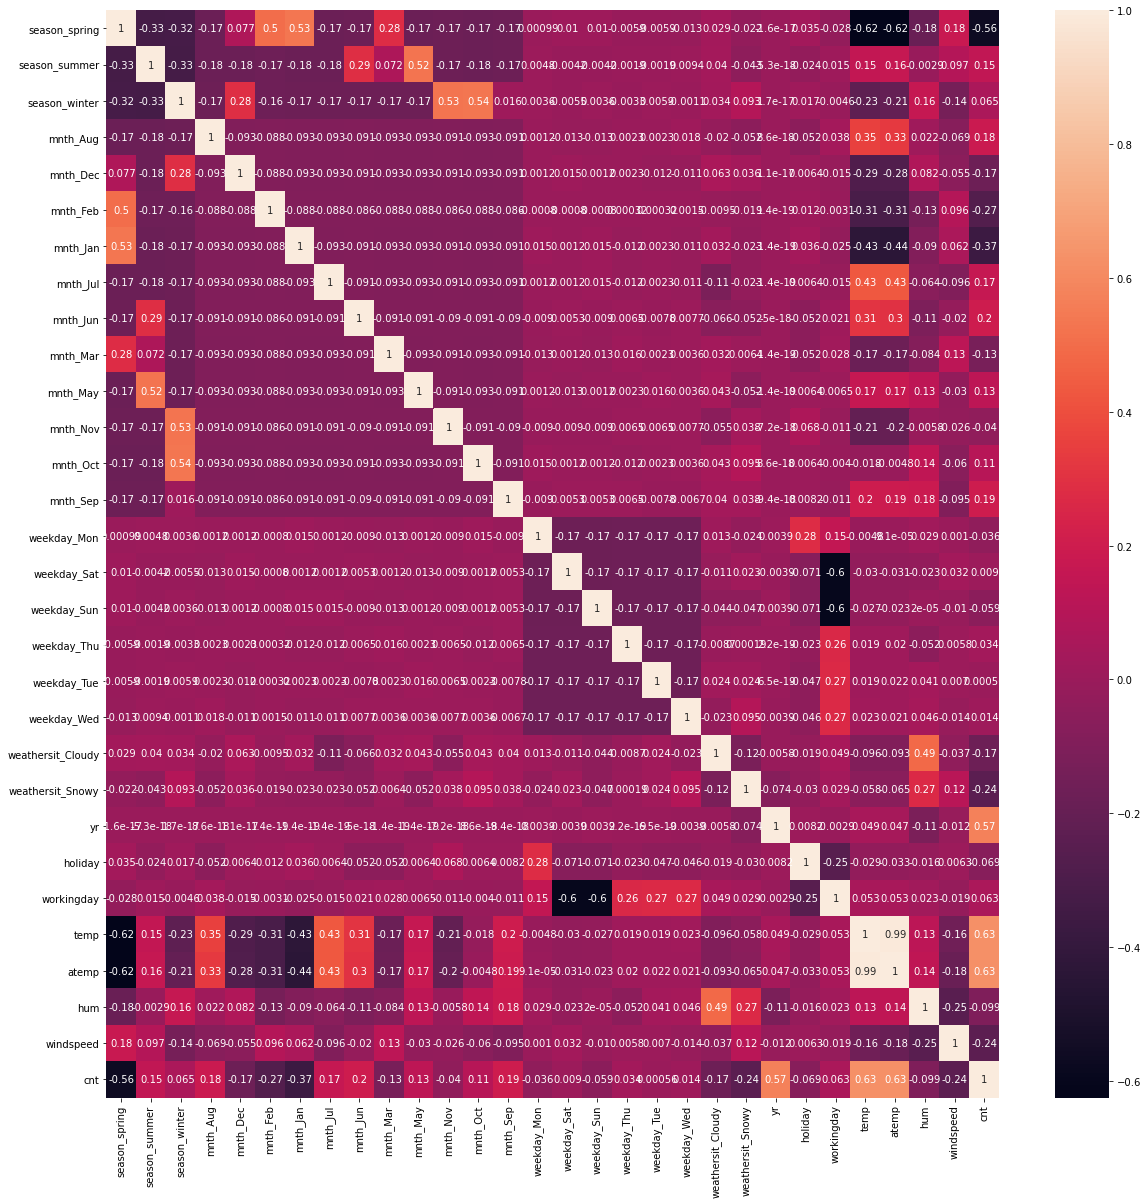

In [37]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)
plt.show()

# Splitting our data into X and y sets for model building 

In [38]:
y_train = df_train.pop('cnt')
X_train = df_train

### Let's First build a model with all predictors and select features initially by RFE

# Step 6: Building a Linear Model

# MODEL : 1

In [39]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [40]:
X_train.shape

(510, 29)

In [41]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 13)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [42]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 9),
 ('mnth_Dec', False, 5),
 ('mnth_Feb', False, 6),
 ('mnth_Jan', False, 3),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 17),
 ('mnth_Mar', False, 16),
 ('mnth_May', False, 8),
 ('mnth_Nov', False, 4),
 ('mnth_Oct', False, 13),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', False, 11),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', False, 10),
 ('weekday_Thu', False, 14),
 ('weekday_Tue', False, 12),
 ('weekday_Wed', False, 15),
 ('weathersit_Cloudy', True, 1),
 ('weathersit_Snowy', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [43]:
# Columns that got selected by RFE 
col = X_train.columns[rfe.support_]
col

Index(['season_spring', 'season_summer', 'season_winter', 'mnth_Jul',
       'mnth_Sep', 'weekday_Sat', 'weathersit_Cloudy', 'weathersit_Snowy',
       'yr', 'holiday', 'temp', 'hum', 'windspeed'],
      dtype='object')

In [44]:
# Columns that didnot get selected 
X_train.columns[~rfe.support_]

Index(['mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'weekday_Mon', 'weekday_Sun',
       'weekday_Thu', 'weekday_Tue', 'weekday_Wed', 'workingday', 'atemp'],
      dtype='object')

In [45]:
X_train_RFE = X_train[col]

In [46]:
X_train_RFE.shape

(510, 13)

# Building Model using Statsmodel  for detailed Statistics

In [47]:
import statsmodels.api as sm

# Add a constant
X_train_RFE = sm.add_constant(X_train_RFE)

# Create a first fitted model
lm = sm.OLS(y_train, X_train_RFE).fit()

In [48]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.0
Date:                Wed, 01 Sep 2021   Prob (F-statistic):          7.51e-190
Time:                        19:15:44   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -993.5
Df Residuals:                     496   BIC:                            -934.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2796      0.03

In [49]:
#Removing Variable weekday_Sat as p_value>0.05 
X_train_RFE.drop('weekday_Sat',axis=1,inplace=True)

In [50]:
X_train_final = X_train_RFE

# Model : 2

In [51]:
X_train_lm = sm.add_constant(X_train_RFE)

In [52]:
lm = sm.OLS(y_train,X_train_lm).fit()

In [53]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     221.2
Date:                Wed, 01 Sep 2021   Prob (F-statistic):          1.69e-190
Time:                        19:15:46   Log-Likelihood:                 509.47
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     497   BIC:                            -937.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2841      0.03

## Let's Look at the VIF Values for the Predictors 

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [55]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values,i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
.vif.sort_values(by='VIF',ascending = False)
vif

,Features,VIF
0,const,74.38
1,season_spring,5.02
2,season_summer,2.61
3,season_winter,3.49
4,mnth_Jul,1.48
5,mnth_Sep,1.30
6,weathersit_Cloudy,1.56
7,weathersit_Snowy,1.24
8,yr,1.03
9,holiday,1.02


In [56]:
# Removing the const variable as it's VIF Value is much >> 5
X_train_final.drop('const',axis=1,inplace=True)

## Let's check the VIF values again 

In [57]:
vif = pd.DataFrame()
vif['Features'] = X_train_final.columns
vif['VIF'] = [variance_inflation_factor(X_train_final.values,i) for i in range(X_train_final.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending = False)
vif

,Features,VIF
10,hum,28.06
9,temp,16.02
11,windspeed,4.65
0,season_spring,4.01
2,season_winter,3.35
1,season_summer,2.78
5,weathersit_Cloudy,2.28
7,yr,2.08
3,mnth_Jul,1.58
4,mnth_Sep,1.38


### Dropping humidity column

In [58]:
X_train_final.drop('hum',axis=1,inplace=True)

## Let's check the VIF values again 

In [59]:
vif = pd.DataFrame()
vif['Features'] = X_train_final.columns
vif['VIF'] = [variance_inflation_factor(X_train_final.values,i) for i in range(X_train_final.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending = False)
vif

,Features,VIF
9,temp,5.09
10,windspeed,4.60
1,season_summer,2.21
0,season_spring,2.08
7,yr,2.07
2,season_winter,1.79
3,mnth_Jul,1.58
5,weathersit_Cloudy,1.55
4,mnth_Sep,1.34
6,weathersit_Snowy,1.08


##  VIF Values seems alright, Now proceeding to final model 

# MODEL : 3

In [60]:
X_train_lm = sm.add_constant(X_train_final)
lm = sm.OLS(y_train,X_train_lm).fit()


In [61]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.4
Date:                Wed, 01 Sep 2021   Prob (F-statistic):          2.40e-187
Time:                        19:15:54   Log-Likelihood:                 499.17
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     498   BIC:                            -923.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1996      0.03

#### Finally all the Predictor Variables have P-Values <0.05 and their VIF Values are also below 5

# Step 7: Residual Analysis

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [62]:
y_train_price = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

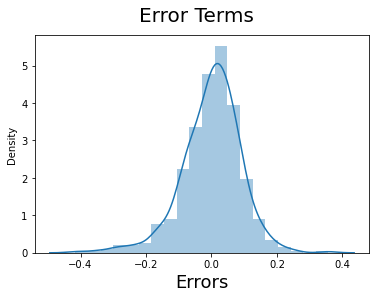

In [63]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

# Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

In [64]:
cols = X_train_lm.columns
cols

Index(['const', 'season_spring', 'season_summer', 'season_winter', 'mnth_Jul',
       'mnth_Sep', 'weathersit_Cloudy', 'weathersit_Snowy', 'yr', 'holiday',
       'temp', 'windspeed'],
      dtype='object')

In [65]:
num_vars =['cnt','hum','windspeed','temp','atemp']

### df_test is already rescaled during the df_train rescaling 

In [66]:
df_test.describe()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Cloudy,weathersit_Snowy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,...,0.319635,0.027397,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592
std,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,...,0.467403,0.163612,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300


In [67]:
y_test = df_test.pop('cnt')

In [68]:
#df_test.drop('cnt',axis=1,inplace=True)
X_test = df_test

In [69]:
X_test.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weekday_Wed,weathersit_Cloudy,weathersit_Snowy,yr,holiday,workingday,temp,atemp,hum,windspeed
184,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0.831783,0.769660,0.657364,0.084219
535,0,1,0,0,0,0,0,0,1,0,...,1,0,0,1,0,1,0.901354,0.842587,0.610133,0.153728
299,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0.511964,0.496145,0.837699,0.334206
221,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0.881625,0.795343,0.437098,0.339570
152,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0.817246,0.741471,0.314298,0.537414


In [70]:
X_test = sm.add_constant(X_test)

In [75]:
X_test=X_test[cols[1:]]
#import statsmodels.api as sm
#X_test = X_test[cols]
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

#X_test.info()

In [76]:
y_test_pred = lm.predict(X_test)

In [77]:
from sklearn.metrics import r2_score
r2_score(y_test,y_test_pred)

0.804941844098238

In [78]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_test_pred)
mse

0.009264444750858148

Text(0, 0.5, 'y_pred')

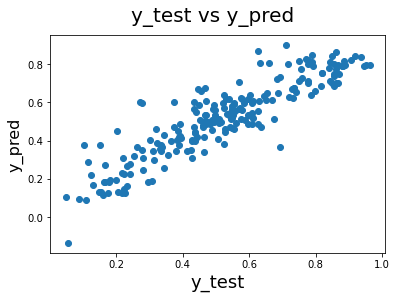

In [79]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

In [80]:
param = pd.DataFrame(lm.params)
param.insert(0,'Variables',param.index)
param.rename(columns = {0:'Coefficient value'},inplace = True)
param['index'] = list(range(0,12))
param.set_index('index',inplace = True)
param.sort_values(by = 'Coefficient value',ascending = False,inplace = True)
param

,Variables,Coefficient value
index,,
10,temp,0.491508
8,yr,0.233482
0,const,0.199648
3,season_winter,0.083084
5,mnth_Sep,0.076686
2,season_summer,0.045280
4,mnth_Jul,-0.052418
1,season_spring,-0.066942
6,weathersit_Cloudy,-0.081558



# We can see that the equation of our best fitted line is:

 cnt = 0.199648 + 0.491508  X  temp + 0.233482  X  yr + 0.083084 X season_winter +0.045280 X season_summer - 0.066942 X season_ spring -0.052418 X mnth_Jul + 0.076686 X mnth_Sep -0.285155 X weathersit_Snowy -0.081558 X weathersit_Cloudy -0.098013 X holiday -0.147977X windspeed 


##### All the positive coefficients like temp,season_Summer indicate that an increase in these values will lead to an increase in the value of cnt.

##### All the negative coefficients  indicate that an increase in these values will lead to an decrease in the value of cnt.

- Temp is the most significant with the largest coefficient.
- Followed by weathersit_Light Snow & Rain.
- Bike rentals is more for the month of september
- The rentals reduce during holidays


This indicates that the bike rentals is majorly affected by temperature,season and month.

# Observation  
1. All the entries are non null so no need to do any deletion work 
2. Here the difference between the mean and median is not significant hence the data doesnot have Outliers
3. In Pair Plot (Numerical Variables)  
   a. Temp and atemp value are almost same(i.e; they have very high correlation & will create multicollinearity issue.  
   b. Temp and atemp have some linear relationship with our target variable   
4. In Box Plot (Categorical Variables)  
   a. Company has performed well and sales on 2019 are more than 2018   
   b. In Season 2 and 3(Summer and Falls) the bike share demand is high   
   c. during holiday time the Bike counts taken for sharing are less   
   d. The cnt has zero values for weather situation - 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'(cat no 4)
5. DATA PREPARATION :  
   a. Removed Instant as it is not adding any info to our data   
   b. Removed dteday as all the other data related to date is given in other columns      
   c. converting the data column number to their meaning for proper understanding and also making their datatype CATEGORICAL  
   d. Casual and Registered both of them are related to the dependent variable and these two variables will create 'data leakage',       as in future we will not be having this data   
6. Modeling Stage   
   a. Initially we have removed columns with the help pf RFE we are now left with 13 columns or predictor variables  
   b. Removing Variable weekday_Sat as p_value much > 0.05     
   c. Removing the const variable as it's VIF Value is much >> 5  
   d. Similarly Dropping Humidity column as  it's VIF value is much >>5  
   e. Final model that we have has R2 sq value 0.836 and adj R2 Sq value as 0.832 which is good means no unnecessary variables added and also VIF values of all variables is < 5 and P-Values is also less than 0.05    
7. Residual Analysis  
   a. the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression)  
8. Making Predictions Stage   
   a. R2 Sq value on our test data is 0.804 which is near by our model value   
   b. Mean Sqred error is also less = 0.009264444750858148    
   
HENCE OUR FINAL EQUATION IS :    
 
 
 cnt = 0.199648 + 0.491508  X  temp + 0.233482  X  yr + 0.083084 X season_winter +0.045280 X season_summer - 0.066942 X season_ spring -0.052418 X mnth_Jul + 0.076686 X mnth_Sep -0.285155 X weathersit_Snowy -0.081558 X weathersit_Cloudy -0.098013 X holiday -0.147977X windspeed 
       
